In [29]:
import time
from copy import deepcopy

import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

import stg_energy.fig6_global.viz as viz
from stg_energy.common import col, samples_nd, svg
from stg_energy.fig5_cc.energy import check_if_close_to_obs

from pyloric.sbi_wrapper import simulate, stats

# Figure 6

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
data_n = np.load("../../results/11deg_post_pred/11_deg_post_pred_close_to_obs.npz")
sample_seeds = data_n["sample_seeds"]
sample_params = data_n["sample_params"]
sample_stats = data_n["sample_stats"]
print("There are", len(sample_seeds), "datapoints in this dataset")

There are 55043 datapoints in this dataset


In [10]:
datafile = "../../results/prior_samples_after_classifier/samples_full_3.npz"
data = np.load(datafile)

params = data["params"]
stats = data["stats"]
seeds = data["seeds"]

stats_mean = np.mean(stats, axis=0)
stats_std = np.std(stats, axis=0)

In [11]:
max_energy_allowed = 1367000
energies = sample_stats[:, 21:24]
summed_energies = np.sum(energies, axis=1)
sample_params_total = sample_params[summed_energies < max_energy_allowed]
sample_stats_total = sample_stats[summed_energies < max_energy_allowed]
sample_seeds_total = sample_seeds[summed_energies < max_energy_allowed]
print(sample_seeds_total.shape)

(98,)


In [12]:
energies_all_ABPD = sample_stats_total[:, 21]
energies_all_LP = sample_stats_total[:, 22]
energies_all_PY = sample_stats_total[:, 23]
energies_all_total = np.sum(sample_stats_total[:, 21:24], axis=1)

In [13]:
energies_all_ABPD = sample_stats[:, 21]
energies_all_LP = sample_stats[:, 22]
energies_all_PY = sample_stats[:, 23]
energies_all_total = np.sum(sample_stats[:, 21:24], axis=1)

### Extract lowest energies for AB/PD

In [14]:
sample_seeds = data_n["sample_seeds"]
sample_params = data_n["sample_params"]
sample_stats = data_n["sample_stats"]

In [15]:
max_energy_allowed = 136900
energies = sample_stats[:, 21:24]
summed_energies = energies[:, 0]
sample_params_ABPD = sample_params[summed_energies < max_energy_allowed]
sample_stats_ABPD = sample_stats[summed_energies < max_energy_allowed]
sample_seeds_ABPD = sample_seeds[summed_energies < max_energy_allowed]
sample_seeds_ABPD.shape

(100,)

In [16]:
energies_ABPD_ABPD = sample_stats_ABPD[:, 21]
energies_ABPD_LP = sample_stats_ABPD[:, 22]
energies_ABPD_PY = sample_stats_ABPD[:, 23]
energies_ABPD_total = np.sum(sample_stats_ABPD[:, 21:24], axis=1)

### Lowest LP

In [17]:
sample_seeds = data_n["sample_seeds"]
sample_params = data_n["sample_params"]
sample_stats = data_n["sample_stats"]

In [18]:
max_energy_allowed = 102100
energies = sample_stats[:, 21:24]
summed_energies = energies[:, 1]
sample_params_LP = sample_params[summed_energies < max_energy_allowed]
sample_stats_LP = sample_stats[summed_energies < max_energy_allowed]
sample_seeds_LP = sample_seeds[summed_energies < max_energy_allowed]
sample_seeds_LP.shape

(99,)

In [19]:
energies_LP_ABPD = sample_stats_LP[:, 21]
energies_LP_LP = sample_stats_LP[:, 22]
energies_LP_PY = sample_stats_LP[:, 23]
energies_LP_total = np.sum(sample_stats_LP[:, 21:24], axis=1)

### Lowest PY energies

In [20]:
sample_seeds = data_n["sample_seeds"]
sample_params = data_n["sample_params"]
sample_stats = data_n["sample_stats"]

In [21]:
max_energy_allowed = 392000
energies = sample_stats[:, 21:24]
summed_energies = energies[:, 2]
sample_params_PY = sample_params[summed_energies < max_energy_allowed]
sample_stats_PY = sample_stats[summed_energies < max_energy_allowed]
sample_seeds_PY = sample_seeds[summed_energies < max_energy_allowed]
sample_seeds_PY.shape

(99,)

In [22]:
energies_PY_ABPD = sample_stats_PY[:, 21]
energies_PY_LP = sample_stats_PY[:, 22]
energies_PY_PY = sample_stats_PY[:, 23]
energies_PY_total = np.sum(sample_stats_PY[:, 21:24], axis=1)

### Test for statistical independence

In [23]:
np.corrcoef(energies[:1000,0], energies[:1000,2])[0,1]

0.008336510184628134

In [24]:
np.corrcoef(energies[:1000,1], energies[:1000,2])[0,1]

0.02893844625324265

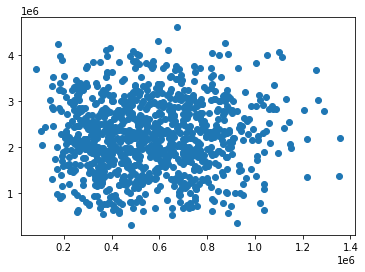

In [25]:
plt.scatter(energies[:1000,1], energies[:1000,2])

### Boxplot

In [26]:
a = np.asarray([1, 2, 3, 4])
positions = np.concatenate((a, a+6, a+12, a+18))

[Text(2.5, 0, 'All posterior samples'),
 Text(8.5, 0, 'AB/PD Efficient'),
 Text(14.5, 0, 'LP Efficient'),
 Text(20.5, 0, 'PY Efficient')]

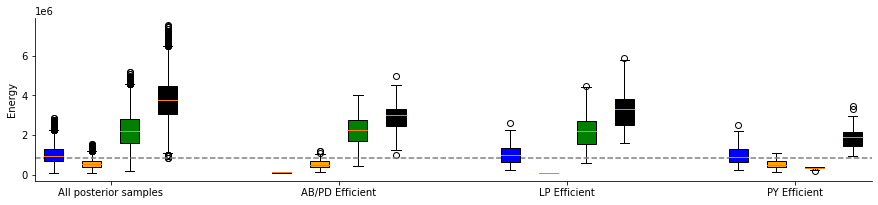

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (15, 3))

box1 = ax.boxplot([energies_all_ABPD, energies_all_LP, energies_all_PY, energies_all_total,
                    energies_ABPD_ABPD, energies_ABPD_LP, energies_ABPD_PY, energies_ABPD_total,
                    energies_LP_ABPD, energies_LP_LP, energies_LP_PY, energies_LP_total, 
                    energies_PY_ABPD, energies_PY_LP, energies_PY_PY, energies_PY_total, ], positions=positions, patch_artist=True)

cols = ['b', 'orange', 'g', 'k', 'b', 'orange', 'g', 'k', 'b', 'orange', 'g', 'k', 'b', 'orange', 'g', 'k']

for i, patch in enumerate(box1['boxes']):
    patch.set(facecolor=cols[i])

ax.axhline(np.min(energies_all_total), linestyle='--', color='grey')

_ = ax.set_ylabel('Energy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([2.5, 8.5, 14.5, 20.5])
ax.set_xticklabels(['All posterior samples', 'AB/PD Efficient', 'LP Efficient', 'PY Efficient'])

### Add the ones that were build by independent composition

In [32]:
npz = np.load("../../results/experimental_data/summstats_prep845_082_0044.npz")
observation = npz["summ_stats"]

In [41]:
all_targets = []
all_counter = 0
offsets = [150000, 95000, 100000, 100000, 100000, 100000, 100000, 40000, 40000, 40000, 40000, 40000, 40000]
scale_bar_ = [False, False]

good_ss = []
all_good_energies = []
all_good_energies_ABPD = []
all_good_energies_LP = []
all_good_energies_PY = []

perfect_params = []
perfect_ss = []

perfect_params_times5 = []
perfect_ss_times5 = []

for _ in range(100):
    ABPD_index = np.random.randint(0, 99, 1)[0] # 99 cause 99 lowest energy samples
    LP_index   = np.random.randint(0, 99, 1)[0] # 99 cause 99 lowest energy samples
    PY_index   = np.random.randint(0, 99, 1)[0] # 99 cause 99 lowest energy samples
    
    syn_index = np.random.randint(0, 3, 1)
    
    if syn_index[0] == 0:
        syn_params = sample_params_ABPD[ABPD_index, 24:]
    if syn_index[0] == 1:
        syn_params = sample_params_LP[LP_index, 24:]
    if syn_index[0] == 2:
        syn_params = sample_params_PY[PY_index, 24:]
        
    comb_params = np.concatenate((sample_params_ABPD[ABPD_index, :8], sample_params_LP[LP_index, 8:16], sample_params_PY[PY_index, 16:24], syn_params))
    
    target_params = deepcopy(comb_params)
    if all_counter % 50 == 0: print('all_counter', all_counter)

    out_target = simulate(deepcopy(target_params), seed=0) # params.true_params gives the synaptic strengths  # 165000    
    
    ss = stats(out_target)
    
    if np.invert(np.any(np.isnan(ss))):
        all_good_energies_ABPD.append(np.sum(out_target['energy'], axis=1)[0])
        all_good_energies_LP.append(np.sum(out_target['energy'], axis=1)[1])
        all_good_energies_PY.append(np.sum(out_target['energy'], axis=1)[2])
        all_good_energies.append(np.sum(out_target['energy']))
        good_ss.append(ss)
        
        num_std = np.asarray([0.02, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])
        response = check_if_close_to_obs(ss, observation, num_std, stats_std=stats_std)
        if response:
            perfect_params.append(target_params)
            perfect_ss.append(ss)
            
        num_std = np.asarray([0.02, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])*5
        response = check_if_close_to_obs(ss, observation, num_std, stats_std=stats_std)
        if response:
            perfect_params_times5.append(target_params)
            perfect_ss_times5.append(ss)
        
    all_counter += 1
    
good_ss = np.asarray(good_ss)
perfect_params = np.asarray(perfect_params)
perfect_ss = np.asarray(perfect_ss)
perfect_params_times5 = np.asarray(perfect_params_times10)
perfect_ss_times5 = np.asarray(perfect_ss_times10)

all_counter 0
all_counter 50


/home/michael/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/michael/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/michael/anaconda3/envs/sbi_prinz/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


[Text(2.5, 0, 'Overall Efficient'),
 Text(8.5, 0, 'AB/PD Efficient'),
 Text(14.5, 0, 'LP Efficient'),
 Text(20.5, 0, 'PY Efficient'),
 Text(26.5, 0, 'Composition')]

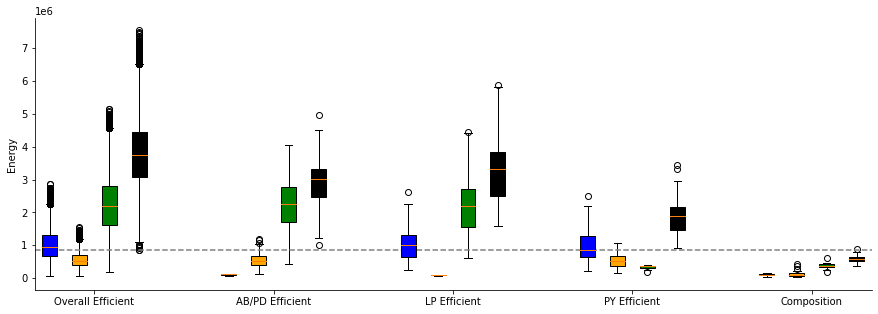

In [42]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

a = np.asarray([1, 2, 3, 4])
positions = np.concatenate((a, a+6, a+12, a+18, a+24))

box1 = ax.boxplot([energies_all_ABPD, energies_all_LP, energies_all_PY, energies_all_total,
                    energies_ABPD_ABPD, energies_ABPD_LP, energies_ABPD_PY, energies_ABPD_total,
                    energies_LP_ABPD, energies_LP_LP, energies_LP_PY, energies_LP_total, 
                    energies_PY_ABPD, energies_PY_LP, energies_PY_PY, energies_PY_total,
                    all_good_energies_ABPD, all_good_energies_LP, all_good_energies_PY, all_good_energies,], positions=positions, patch_artist=True)

cols = ['b', 'orange', 'g', 'k', 'b', 'orange', 'g', 'k', 'b', 'orange', 'g', 'k', 'b', 'orange', 'g', 'k', 'b', 'orange', 'g', 'k']

for i, patch in enumerate(box1['boxes']):
    patch.set(facecolor=cols[i])

ax.axhline(np.min(energies_all_total), linestyle='--', color='grey')

_ = ax.set_ylabel('Energy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([2.5, 8.5, 14.5, 20.5, 26.5])
ax.set_xticklabels(['Overall Efficient', 'AB/PD Efficient', 'LP Efficient', 'PY Efficient', 'Composition'])